Text(0, 0.5, 'Amount of Windows')

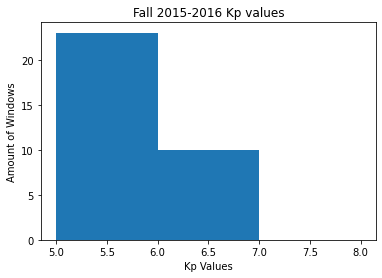

In [2]:
import numpy as np
import datetime 
#list_of_dates = ['20150223-20150430.lst','20160201-20160430.lst']
#list_of_dates = ['20150501-20150731.lst','20160501-20160731.lst']
#list_of_dates = ['20150801-20151031.lst','20160801-20161031.lst']
list_of_dates = ['20151101-20160131.lst','20161101-20170131.lst']
data = np.array(())
for file_name in list_of_dates:
    dataIO = open(file_name)
    data_list = dataIO.read()
    data_array = data_list.split()
    data_temp = np.array(data_array)
    data_length = int(len(data_array)/6)
    data_temp = data_temp.reshape((data_length,6))
    if data.size > 0:
        data = np.vstack((data,data_temp))
    else:
        data = data_temp
#Input
Kp = 5
#Make a list of all the windows  with over 30 kp value
Over30 = []
for i in range(0, data.shape[0], 3):
    current_row = data[i,:]
    if (int(current_row[5]) >= Kp * 10):
        Over30.append(current_row)
#The Over30 list is an array of arrays. Each day chunk has mutiple datasets with index 5 as kp value
kp_list = []
for i in range(len(Over30)):
    kp_list.append(int(Over30[i][5])/10)
    
import matplotlib.pyplot as plt
plt.hist(kp_list, bins=[5,6,7,8])
plt.title('Fall 2015-2016 Kp values')
plt.xlabel('Kp Values')
plt.ylabel('Amount of Windows')

In [3]:
len(kp_list)

33

In [4]:
#Makes string output of array of start times
year_string_start = ["" for x in range(len(Over30))]
year_string_end = ["" for x in range(len(Over30))]
for index, i in enumerate(Over30):
    year = int(i[0])
    DOY = int(i[1])
    Hour = int(i[2])
    time = datetime.datetime(year, 1, 1) + datetime.timedelta(DOY - 1) + datetime.timedelta(hours = Hour)
    year_string = f'datetime.datetime({time.year},{time.month},{time.day},{time.hour},0)'
    year_string_start[index] = year_string
    time = time + datetime.timedelta(hours = 3)
    year_end = f'datetime.datetime({time.year},{time.month},{time.day},{time.hour},0)'
    year_string_end[index] = year_end

start = "["
end = "["

for i in range(len(year_string_start)):
    #Last in array
    if (i == len(year_string_start)-1):
        start = start + year_string_start[i] + ']'
        end = end + year_string_end[i] + ']'
    else:
        start = start + year_string_start[i] + ', '
        end = end + year_string_end[i] + ', '
start

'[datetime.datetime(2015,11,3,6,0), datetime.datetime(2015,11,4,3,0), datetime.datetime(2015,11,4,6,0), datetime.datetime(2015,11,4,12,0), datetime.datetime(2015,11,7,3,0), datetime.datetime(2015,11,7,6,0), datetime.datetime(2015,11,10,6,0), datetime.datetime(2015,11,10,9,0), datetime.datetime(2015,11,10,12,0), datetime.datetime(2015,11,18,21,0), datetime.datetime(2015,11,30,6,0), datetime.datetime(2015,12,10,3,0), datetime.datetime(2015,12,14,21,0), datetime.datetime(2015,12,20,3,0), datetime.datetime(2015,12,20,6,0), datetime.datetime(2015,12,20,12,0), datetime.datetime(2015,12,20,15,0), datetime.datetime(2015,12,20,18,0), datetime.datetime(2015,12,20,21,0), datetime.datetime(2015,12,21,0,0), datetime.datetime(2015,12,21,3,0), datetime.datetime(2015,12,21,6,0), datetime.datetime(2015,12,31,12,0), datetime.datetime(2015,12,31,18,0), datetime.datetime(2015,12,31,21,0), datetime.datetime(2016,1,1,0,0), datetime.datetime(2016,1,1,3,0), datetime.datetime(2016,1,1,6,0), datetime.datetime(2

In [5]:
end

'[datetime.datetime(2015,11,3,9,0), datetime.datetime(2015,11,4,6,0), datetime.datetime(2015,11,4,9,0), datetime.datetime(2015,11,4,15,0), datetime.datetime(2015,11,7,6,0), datetime.datetime(2015,11,7,9,0), datetime.datetime(2015,11,10,9,0), datetime.datetime(2015,11,10,12,0), datetime.datetime(2015,11,10,15,0), datetime.datetime(2015,11,19,0,0), datetime.datetime(2015,11,30,9,0), datetime.datetime(2015,12,10,6,0), datetime.datetime(2015,12,15,0,0), datetime.datetime(2015,12,20,6,0), datetime.datetime(2015,12,20,9,0), datetime.datetime(2015,12,20,15,0), datetime.datetime(2015,12,20,18,0), datetime.datetime(2015,12,20,21,0), datetime.datetime(2015,12,21,0,0), datetime.datetime(2015,12,21,3,0), datetime.datetime(2015,12,21,6,0), datetime.datetime(2015,12,21,9,0), datetime.datetime(2015,12,31,15,0), datetime.datetime(2015,12,31,21,0), datetime.datetime(2016,1,1,0,0), datetime.datetime(2016,1,1,3,0), datetime.datetime(2016,1,1,6,0), datetime.datetime(2016,1,1,9,0), datetime.datetime(2016,1